In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation


In [2]:
df = pd.read_csv("../datasets/ProcessedData.csv")
df

,Unnamed: 0.1,Unnamed: 0,AirName,Comments,DateFlown,Review,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,ReviewDate,ReviewTitle,ReviewrCountry,SeatComfortRating,SeatType,ServiceRating,ValueRating,WifiRating
0,0,0,airasia,according their check in process they mention...,1022,according check process mentioned able start o...,1,1,1,1,0,1122,bring food,Malaysia,1,Economy Class,3,2,1
1,1,1,airasia,nice uneventful short flight clean aircraft ...,1122,nice uneventful short flight clean aircraft su...,0,0,5,9,1,1122,nice uneventful short flight,Malaysia,4,Economy Class,5,5,0
2,2,2,airasia,never again with airasia i wish i could have ...,1122,never airasia wish could given star coming loy...,0,1,1,1,0,1122,never airasia,Malaysia,1,Economy Class,1,2,0
3,3,3,airasia,my wife has problems with her knees and has gr...,1022,wife problem knee great difficulty stair notif...,0,0,1,2,1,1122,time board wheelchair,Malaysia,1,Economy Class,1,1,0
4,4,4,airasia,my flight was suppose to be at pm on ...,1022,flight suppose pm flight got delayed pm waited...,0,0,1,1,0,1122,bad experience,Malaysia,1,Economy Class,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18629,18629,18816,united-airlines,my whole experience this evening from an hour...,322,whole experience evening hour getting security...,1,1,1,1,0,322,made feel like cattle united airline,United States,1,Economy Class,2,1,0
18630,18630,18817,united-airlines,united is the most unorganized airline in exis...,322,united unorganized airline existence way handl...,1,1,1,1,0,322,clue,United States,1,Economy Class,1,1,1
18631,18631,18818,united-airlines,we flew from fl to houston on february th an...,222,flew fl houston february th great experience h...,0,5,5,10,1,322,flight attendant blessing attentive,United States,5,Economy Class,5,5,0
18632,18632,18819,united-airlines,stuck in denver for almost hours because yo...,322,stuck denver almost hour wanted book tight lay...,1,1,1,1,0,322,never fly united,United States,1,Economy Class,1,1,0


In [3]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'AirName', 'Comments', 'DateFlown',
       'Review', 'EntertainmentRating', 'FoodRating', 'GroundServiceRating',
       'OverallScore', 'Recommended', 'ReviewDate', 'ReviewTitle',
       'ReviewrCountry', 'SeatComfortRating', 'SeatType', 'ServiceRating',
       'ValueRating', 'WifiRating'],
      dtype='object')

In [4]:
df.drop(columns=["Unnamed: 0.1"],inplace=True)

In [5]:
df

,Unnamed: 0,AirName,Comments,DateFlown,Review,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,ReviewDate,ReviewTitle,ReviewrCountry,SeatComfortRating,SeatType,ServiceRating,ValueRating,WifiRating
0,0,airasia,according their check in process they mention...,1022,according check process mentioned able start o...,1,1,1,1,0,1122,bring food,Malaysia,1,Economy Class,3,2,1
1,1,airasia,nice uneventful short flight clean aircraft ...,1122,nice uneventful short flight clean aircraft su...,0,0,5,9,1,1122,nice uneventful short flight,Malaysia,4,Economy Class,5,5,0
2,2,airasia,never again with airasia i wish i could have ...,1122,never airasia wish could given star coming loy...,0,1,1,1,0,1122,never airasia,Malaysia,1,Economy Class,1,2,0
3,3,airasia,my wife has problems with her knees and has gr...,1022,wife problem knee great difficulty stair notif...,0,0,1,2,1,1122,time board wheelchair,Malaysia,1,Economy Class,1,1,0
4,4,airasia,my flight was suppose to be at pm on ...,1022,flight suppose pm flight got delayed pm waited...,0,0,1,1,0,1122,bad experience,Malaysia,1,Economy Class,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18629,18816,united-airlines,my whole experience this evening from an hour...,322,whole experience evening hour getting security...,1,1,1,1,0,322,made feel like cattle united airline,United States,1,Economy Class,2,1,0
18630,18817,united-airlines,united is the most unorganized airline in exis...,322,united unorganized airline existence way handl...,1,1,1,1,0,322,clue,United States,1,Economy Class,1,1,1
18631,18818,united-airlines,we flew from fl to houston on february th an...,222,flew fl houston february th great experience h...,0,5,5,10,1,322,flight attendant blessing attentive,United States,5,Economy Class,5,5,0
18632,18819,united-airlines,stuck in denver for almost hours because yo...,322,stuck denver almost hour wanted book tight lay...,1,1,1,1,0,322,never fly united,United States,1,Economy Class,1,1,0


In [6]:
df.groupby("AirName").describe()

Unnamed: 0                                \
                                         count     mean         std      min   
AirName                                                                        
Air India                                390.0   1213.5  112.727548   1019.0   
Ana                                      390.0   2418.5  112.727548   2224.0   
air-europa                               390.0    433.5  112.727548    239.0   
air-france                               390.0    823.5  112.727548    629.0   
air-new-zealand                          390.0   1634.5  112.727548   1440.0   
airasia                                  239.0    119.0   69.137544      0.0   
american-airlines                        390.0   2028.5  112.727548   1834.0   
austrian-airlines                        390.0   2817.5  112.727548   2623.0   
bangkok-airways                          390.0   3229.5  112.727548   3035.0   
british-airways                          390.0   3624.5  112.727548   3430.0   
emirates                                 390.0   4014.5  112.727548   3820.0   
ethiopian-airlines                       390.0   4404.5  112.727548   4210.0   
flydubai                                 336.0   4767.5   97.139076   4600.0   
frontier-airlines                        390.0   5130.5  112.727548   4936.0   
gulf-air                                 350.0   5500.5  101.180532   5326.0   
hawaiian-airlines                        390.0   5870.5  112.727548   5676.0   
indigo-airlines                          389.0   6260.0  112.438872   6066.0   
japan-airlines                           382.0   6645.5  110.418145   6455.0   
jet2-com                                 385.0   7029.0  111.284171   6837.0   
kenya-airways                            387.0   7415.0  111.861522   7222.0   
korean-air                               390.0   7803.5  112.727548   7609.0   
lufthansa                                390.0   8193.5  112.727548   7999.0   
malaysia-airlines                        390.0   8583.5  112.727548   8389.0   
monarch-airlines                         318.0   8937.5   91.942917   8779.0   
oman-air                                 390.0   9407.5  112.727548   9213.0   
pegasus-airlines                         368.0   9786.5  106.376689   9603.0   
philippine-airlines                      390.0  10165.5  112.727548   9971.0   
pia-pakistan-international-airlines      146.0  10433.5   42.290661  10361.0   
porter-airlines                          301.0  10657.0   87.035433  10507.0   
qantas-airways                           390.0  11002.5  112.727548  10808.0   
qatar-airways                            390.0  11392.5  112.727548  11198.0   
royal-air-maroc                          310.0  11742.5   89.633513  11588.0   
royal-brunei-airlines                    349.0  12072.0  100.891856  11898.0   
royal-jordanian-airlines                 350.0  12421.5  101.180532  12247.0   
ryanair                                  390.0  12791.5  112.727548  12597.0   
sas-scandinavian-airlines                390.0  13181.5  112.727548  12987.0   
saudi-arabian-airlines                   359.0  13556.0  103.778611  13377.0   
scoot                                    390.0  13930.5  112.727548  13736.0   
singapore-airlines                       390.0  14320.5  112.727548  14126.0   
south-african-airways                    390.0  14710.5  112.727548  14516.0   
southwest-airlines                       390.0  15100.5  112.727548  14906.0   
spicejet                                 390.0  15490.5  112.727548  15296.0   
spirit-airlines                          390.0  15880.5  112.727548  15686.0   
srilankan-airlines                       127.0  16139.0   36.805797  16076.0   
sun-country-airlines                     297.0  16351.0   85.880731  16203.0   
sunwing-airlines                         384.0  16691.5  110.995495  16500.0   
swiss-international-air-lines            390.0  17078.5  112.727548  16884.0   
swoop                               

In [10]:
top_airlines = df.groupby("AirName")['OverallScore'].mean().nlargest(10)

In [12]:
top_airlines

AirName
Ana                      7.958974
bangkok-airways          7.512821
japan-airlines           7.374346
qatar-airways            7.361538
korean-air               7.289744
royal-brunei-airlines    7.240688
jet2-com                 6.646753
indigo-airlines          6.326478
monarch-airlines         6.094340
singapore-airlines       6.010256
Name: OverallScore, dtype: float64

In [11]:
top_airlines.index 

Index(['Ana', 'bangkok-airways', 'japan-airlines', 'qatar-airways',
       'korean-air', 'royal-brunei-airlines', 'jet2-com', 'indigo-airlines',
       'monarch-airlines', 'singapore-airlines'],
      dtype='object', name='AirName')

In [14]:
top_airlines.values

array([7.95897436, 7.51282051, 7.37434555, 7.36153846, 7.28974359,
       7.24068768, 6.64675325, 6.32647815, 6.09433962, 6.01025641])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Ana'),
  Text(1, 0, 'bangkok-airways'),
  Text(2, 0, 'japan-airlines'),
  Text(3, 0, 'qatar-airways'),
  Text(4, 0, 'korean-air'),
  Text(5, 0, 'royal-brunei-airlines'),
  Text(6, 0, 'jet2-com'),
  Text(7, 0, 'indigo-airlines'),
  Text(8, 0, 'monarch-airlines'),
  Text(9, 0, 'singapore-airlines')])

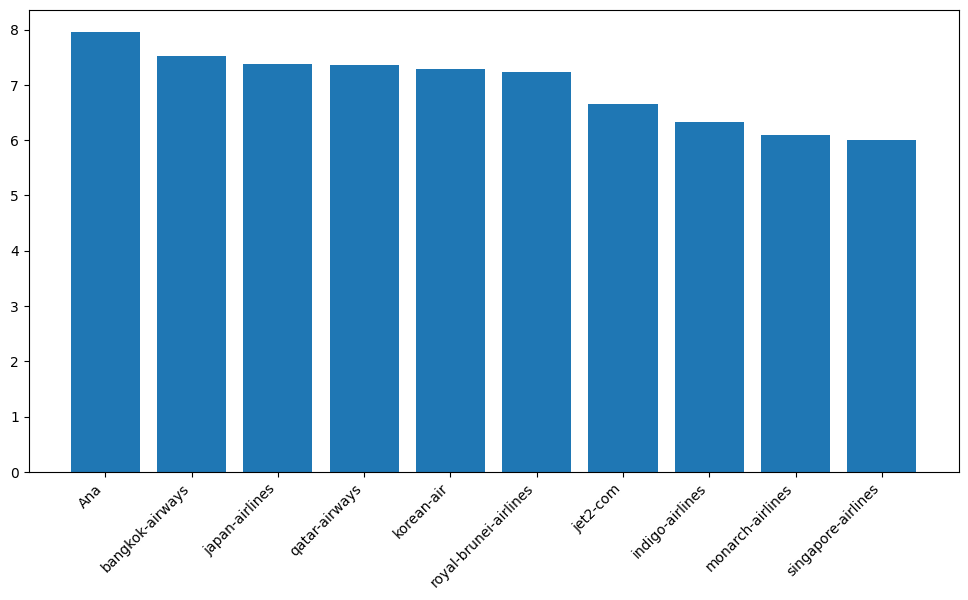

In [19]:
plt.figure(figsize=(12,6))
plt.bar(top_airlines.index,top_airlines.values)
plt.xticks(rotation=45,ha='right')

In [91]:
x = df['AirName'].unique()
x

array(['airasia', 'air-europa', 'air-france', 'Air India',
       'air-new-zealand', 'american-airlines', 'Ana', 'austrian-airlines',
       'bangkok-airways', 'british-airways', 'emirates',
       'ethiopian-airlines', 'flydubai', 'frontier-airlines', 'gulf-air',
       'hawaiian-airlines', 'indigo-airlines', 'japan-airlines',
       'jet2-com', 'kenya-airways', 'korean-air', 'lufthansa',
       'malaysia-airlines', 'monarch-airlines', 'oman-air',
       'pegasus-airlines', 'philippine-airlines',
       'pia-pakistan-international-airlines', 'porter-airlines',
       'qantas-airways', 'qatar-airways', 'royal-air-maroc',
       'royal-brunei-airlines', 'royal-jordanian-airlines', 'ryanair',
       'sas-scandinavian-airlines', 'saudi-arabian-airlines', 'scoot',
       'singapore-airlines', 'south-african-airways',
       'southwest-airlines', 'spicejet', 'spirit-airlines',
       'srilankan-airlines', 'sun-country-airlines', 'sunwing-airlines',
       'swiss-international-air-lines', 's

In [92]:
df.groupby("OverallScore").describe()

Unnamed: 0                                                      \
                  count          mean          std    min      25%      50%   
OverallScore                                                                  
1                6813.0  10121.102892  5959.938836    0.0  4730.00  10837.0   
2                1807.0   9607.592695  5568.221212    3.0  4674.50   9838.0   
3                1225.0   9471.813061  5356.847324   18.0  4788.00   9540.0   
4                 695.0   9182.194245  5047.215530  139.0  4686.50   9039.0   
5                 811.0   8899.759556  4974.380749    5.0  4556.50   8639.0   
6                 689.0   9024.869376  4812.691305  143.0  5437.00   9005.0   
7                1010.0   8692.501980  4975.892751  108.0  4519.00   8718.5   
8                1554.0   8900.955598  4852.920223   20.0  5433.75   8657.5   
9                1762.0   8746.799659  4821.889397    1.0  4705.50   8469.0   
10               2268.0   8873.545414  4988.225761   85.0  4408.00   8563.0   

                                DateFlown              ... ValueRating       \
                   75%      max     count        mean  ...         75%  max   
OverallScore                                           ...                    
1             15768.00  18820.0    6813.0  692.772934  ...         1.0  5.0   
2             14450.00  18808.0    1807.0  687.553403  ...         2.0  5.0   
3             13974.00  18811.0    1225.0  681.249796  ...         3.0  5.0   
4             13452.00  18772.0     695.0  701.667626  ...         3.0  5.0   
5             12876.00  18685.0     811.0  660.601726  ...         4.0  5.0   
6             13194.00  18689.0     689.0  703.635704  ...         4.0  5.0   
7             12565.50  18810.0    1010.0  651.642574  ...         4.0  5.0   
8             12549.25  18708.0    1554.0  669.391248  ...         5.0  5.0   
9             12220.25  18791.0    1762.0  663.083995  ...         5.0  5.0   
10            12509.50  18818.0    2268.0  676.464286  ...         5.0  5.0   

             WifiRating                                               
                  count      mean       std  min  25%  50%  75%  max  
OverallScore                                                          
1                6813.0  0.440041  0.747157  0.0  0.0  0.0  1.0  5.0  
2                1807.0  0.484781  0.892733  0.0  0.0  0.0  1.0  5.0  
3                1225.0  0.536327  1.007583  0.0  0.0  0.0  1.0  5.0  
4                 695.0  0.513669  1.005475  0.0  0.0  0.0  1.0  5.0  
5                 811.0  0.450062  1.087940  0.0  0.0  0.0  0.0  5.0  
6                 689.0  0.523948  1.218710  0.0  0.0  0.0  0.0  5.0  
7                1010.0  0.443564  1.157251  0.0  0.0  0.0  0.0  5.0  
8                1554.0  0.474260  1.264573  0.0  0.0  0.0  0.0  5.0  
9                1762.0  0.637911  1.477253  0.0  0.0  0.0  0.0  5.0  
10               2268.0  1.085538  1.962080  0.0  0.0  0.0  1.0  5.0  

[10 rows x 88 columns]

In [93]:
df.groupby("AirName")['OverallScore'].mean()

AirName
Air India                              3.100000
Ana                                    7.958974
air-europa                             3.671795
air-france                             4.202564
air-new-zealand                        4.841026
airasia                                3.012552
american-airlines                      2.082051
austrian-airlines                      4.494872
bangkok-airways                        7.512821
british-airways                        4.194872
emirates                               4.051282
ethiopian-airlines                     4.458974
flydubai                               3.571429
frontier-airlines                      1.446154
gulf-air                               5.400000
hawaiian-airlines                      4.771795
indigo-airlines                        6.326478
japan-airlines                         7.374346
jet2-com                               6.646753
kenya-airways                          4.635659
korean-air                      

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(stop_words='english')

In [21]:
x = vec.fit_transform(df['Review'])

In [22]:
x.shape

(18634, 15622)

In [23]:
vec.get_feature_names_out()

array(['aa', 'aaadvantage', 'aadvantage', ..., 'zurich', 'zvartnots',
       'zya'], dtype=object)

In [24]:
feature_names = vec.get_feature_names_out() 

In [25]:
num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(x)

LatentDirichletAllocation(random_state=42)

In [26]:
lda.components_.shape

(10, 15622)

In [27]:
lda.components_[0]

array([12.45912962,  0.10015832,  0.1000665 , ...,  1.15607932,
        0.10021604,  0.1       ])

In [29]:
for i,j in enumerate(lda.components_):
    print(i," ",j)

0   [12.45912962  0.10015832  0.1000665  ...  1.15607932  0.10021604
  0.1       ]
1   [ 5.50232491  0.1         0.1        ... 49.16271833  0.1
  0.1       ]
2   [55.28758357  0.10004853  2.09980485 ... 50.1205463   1.09949599
  0.10001498]
3   [ 0.10001852  0.1         0.1        ... 12.52544063  0.1
  1.09988909]
4   [ 3.25530408  0.1         0.10012864 ... 38.83759221  0.1
  0.10009593]
5   [ 3.21565244  0.1         0.1        ... 97.4231164   0.1
  0.1       ]
6   [2.85009977e+00 1.00000000e-01 1.00000000e-01 ... 1.36446534e+02
 1.00287952e-01 1.00000000e-01]
7   [1.129855   0.10026663 0.1        ... 0.10002093 0.1        0.1       ]
8   [0.10001478 1.09952651 0.1        ... 0.10862949 0.1        0.1       ]
9   [0.1000173  0.1        0.1        ... 0.11932255 0.1        0.1       ]


In [28]:
lda.components_[:,:100]

array([[1.24591296e+01, 1.00158319e-01, 1.00066502e-01, 1.00000000e-01,
        1.00000000e-01, 1.00000000e-01, 1.00000000e-01, 1.00000000e-01,
        1.00015801e-01, 1.00005790e-01, 1.00000000e-01, 1.00009702e-01,
        1.99401838e+00, 1.00000000e-01, 1.00015233e-01, 1.00000000e-01,
        1.00000001e-01, 2.13575389e+01, 2.09996924e+00, 1.00000000e-01,
        1.00000000e-01, 1.00000000e-01, 1.00000000e-01, 1.00009809e-01,
        1.00000000e-01, 1.00040038e-01, 1.00000000e-01, 5.99861939e+00,
        1.00006695e-01, 1.33093679e+02, 1.00000000e-01, 1.00114165e-01,
        4.93989582e+00, 1.00038635e-01, 1.00000000e-01, 1.00000001e-01,
        1.00000000e-01, 1.00000000e-01, 1.00034418e-01, 1.00000001e-01,
        1.00000000e-01, 4.62062062e+00, 3.75289047e+00, 1.00027441e-01,
        1.00109991e-01, 1.00011529e-01, 1.00002279e-01, 1.00000000e-01,
        1.00000000e-01, 1.00000000e-01, 3.45514844e+01, 1.09960590e+00,
        7.47058736e+01, 1.00163160e-01, 1.00022594e-01, 1.084432

In [31]:
feature_names = vec.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print("Topic #%d:" % topic_idx)
    
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))
    print()


Topic #0:
flight ticket bag airline customer service refund luggage pay booked

Topic #1:
flight seat time booked air year delhi india asked wife

Topic #2:
flight hour delayed time airport delay airline day pm minute

Topic #3:
seat flight staff bangkok check airport extra leg crew room

Topic #4:
check boarding lounge airport johannesburg business class airway counter nairobi

Topic #5:
flight service air paris airline casablanca experience business doha customer

Topic #6:
flight seat food good service crew cabin class business time

Topic #7:
airline time fly service experience flight worst istanbul review flying

Topic #8:
flight time th flew airline return crew staff plane jet

Topic #9:
flight seat plane aircraft staff kuala lumpur boarding crew old
